In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("Carbon Emission.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [4]:
df

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


Data Preprocessing

In [5]:
df['Vehicle Type'].fillna(df['Vehicle Type'].mode()[0], inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   10000 non-null  object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [7]:
object_columns = df.select_dtypes("object").columns.to_list()
number_columns = df.drop(object_columns, axis=1).columns.to_list()

In [8]:
object_columns

['Body Type',
 'Sex',
 'Diet',
 'How Often Shower',
 'Heating Energy Source',
 'Transport',
 'Vehicle Type',
 'Social Activity',
 'Frequency of Traveling by Air',
 'Waste Bag Size',
 'Energy efficiency',
 'Recycling',
 'Cooking_With']

In [9]:
number_columns

['Monthly Grocery Bill',
 'Vehicle Monthly Distance Km',
 'Waste Bag Weekly Count',
 'How Long TV PC Daily Hour',
 'How Many New Clothes Monthly',
 'How Long Internet Daily Hour',
 'CarbonEmission']

In [10]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


cột chứa ngoại lai

Vehicle Monthly Distance Km &&
CarbonEmission

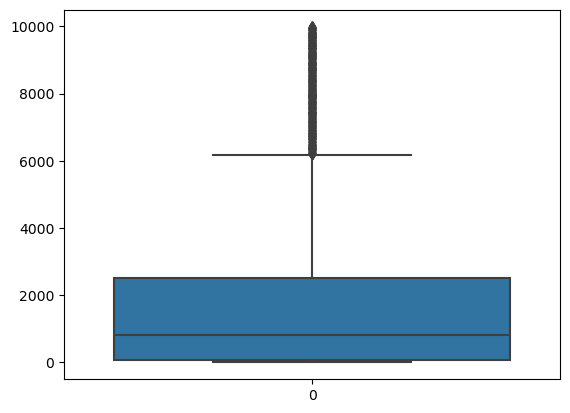

In [11]:
import seaborn as sns
fig, axs = plt.subplots()
sns.boxplot(data=df['Vehicle Monthly Distance Km'])
plt.show()

In [12]:
q25, q75 = np.quantile(df["Vehicle Monthly Distance Km"], 0.25), np.quantile(df["Vehicle Monthly Distance Km"], 0.75)
iqr = q75 - q25
lower, upper = q25 - 0.1*iqr, q75 + 0.1*iqr
df_iqr = df[(df["Vehicle Monthly Distance Km"] < upper) & (df["Vehicle Monthly Distance Km"] > lower)]

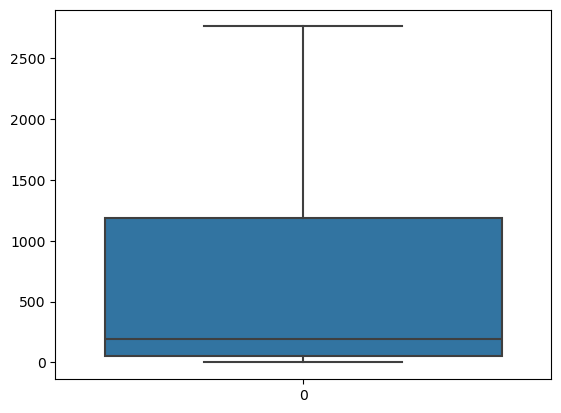

In [13]:
import seaborn as sns
fig, axs = plt.subplots()
sns.boxplot(data=df_iqr['Vehicle Monthly Distance Km'])
plt.show()

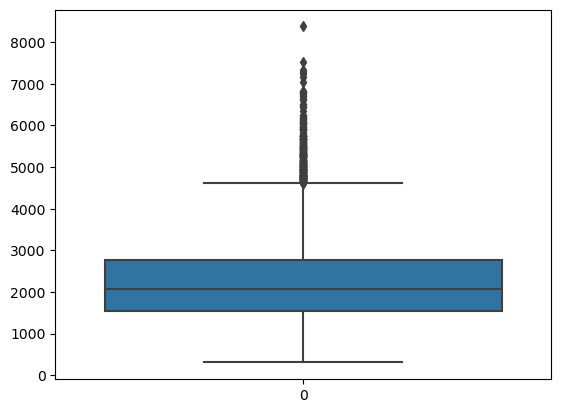

In [14]:
import seaborn as sns
fig, axs = plt.subplots()
sns.boxplot(data=df['CarbonEmission'])
plt.show()

In [15]:
q25, q75 = np.quantile(df_iqr["CarbonEmission"], 0.25), np.quantile(df_iqr["CarbonEmission"], 0.75)
iqr = q75 - q25
lower, upper = q25 - 1.5*iqr, q75 + 1.5*iqr
df_iqr = df_iqr[(df["CarbonEmission"] < upper) & (df_iqr["CarbonEmission"] > lower)]

C:\Users\truon\AppData\Local\Temp\ipykernel_12176\321143847.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr = df_iqr[(df["CarbonEmission"] < upper) & (df_iqr["CarbonEmission"] > lower)]


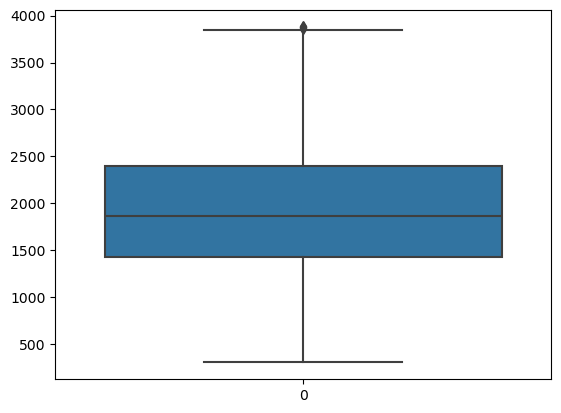

In [16]:
import seaborn as sns
fig, axs = plt.subplots()
sns.boxplot(data=df_iqr['CarbonEmission'])
plt.show()

In [17]:
df_iqr.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,7512.000000,7512.000000,7512.000000,7512.000000,7512.00000,7512.000000,7512.000000
mean,173.096246,617.280218,4.020101,12.185170,24.94369,11.868078,1936.142971
std,72.187934,704.369176,1.985233,7.107608,14.66010,7.247294,664.650179
min,50.000000,0.000000,1.000000,0.000000,0.00000,0.000000,306.000000
25%,111.000000,53.000000,2.000000,6.000000,12.00000,6.000000,1433.000000
50%,172.000000,191.000000,4.000000,12.000000,25.00000,12.000000,1867.000000
75%,236.000000,1170.500000,6.000000,18.000000,37.00000,18.000000,2400.000000
max,299.000000,2761.000000,7.000000,24.000000,50.00000,24.000000,3884.000000


In [18]:
df_iqr['Body Type'].value_counts()

Body Type
underweight    1910
overweight     1883
normal         1875
obese          1844
Name: count, dtype: int64

In [19]:
df_iqr['Sex'].value_counts()

Sex
female    3764
male      3748
Name: count, dtype: int64

In [20]:
df_iqr['Diet'].value_counts()

Diet
pescatarian    1938
vegan          1886
vegetarian     1870
omnivore       1818
Name: count, dtype: int64

In [21]:
df_iqr['How Often Shower'].value_counts()

How Often Shower
daily              1956
less frequently    1878
twice a day        1852
more frequently    1826
Name: count, dtype: int64

In [22]:
df_iqr['Heating Energy Source'].value_counts()

Heating Energy Source
electricity    1932
natural gas    1873
coal           1860
wood           1847
Name: count, dtype: int64

In [23]:
df_iqr['Transport'].value_counts()

Transport
walk/bicycle    3414
public          3268
private          830
Name: count, dtype: int64

In [24]:
df_iqr['Vehicle Type'].value_counts()

Vehicle Type
lpg         6856
electric     181
petrol       168
hybrid       160
diesel       147
Name: count, dtype: int64

In [25]:
df_iqr['Social Activity'].value_counts()

Social Activity
never        2558
often        2491
sometimes    2463
Name: count, dtype: int64

In [26]:
df_iqr['Frequency of Traveling by Air'].value_counts()

Frequency of Traveling by Air
frequently         1912
never              1901
very frequently    1876
rarely             1823
Name: count, dtype: int64

In [27]:
df_iqr['Waste Bag Size'].value_counts()

Waste Bag Size
small          1948
large          1871
extra large    1862
medium         1831
Name: count, dtype: int64

In [28]:
df_iqr['Energy efficiency'].value_counts()

Energy efficiency
Sometimes    2607
Yes          2467
No           2438
Name: count, dtype: int64

In [29]:
df_iqr['Recycling'].value_counts()

Recycling
['Paper', 'Plastic', 'Metal']             494
['Plastic', 'Metal']                      493
[]                                        489
['Paper', 'Plastic', 'Glass', 'Metal']    488
['Paper', 'Glass', 'Metal']               485
['Glass', 'Metal']                        485
['Paper', 'Plastic']                      478
['Plastic', 'Glass', 'Metal']             477
['Paper']                                 472
['Paper', 'Glass']                        465
['Plastic', 'Glass']                      457
['Metal']                                 455
['Paper', 'Plastic', 'Glass']             452
['Paper', 'Metal']                        445
['Glass']                                 443
['Plastic']                               434
Name: count, dtype: int64

In [30]:
df_iqr['Cooking_With'].value_counts()

Cooking_With
['Stove', 'Microwave', 'Grill', 'Airfryer']            492
['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']    486
['Stove', 'Oven']                                      484
['Stove', 'Microwave']                                 482
['Stove', 'Grill', 'Airfryer']                         479
['Oven', 'Microwave']                                  477
['Microwave', 'Grill', 'Airfryer']                     476
[]                                                     468
['Oven', 'Microwave', 'Grill', 'Airfryer']             467
['Stove', 'Oven', 'Microwave']                         464
['Stove', 'Oven', 'Grill', 'Airfryer']                 463
['Microwave']                                          462
['Grill', 'Airfryer']                                  459
['Oven']                                               454
['Oven', 'Grill', 'Airfryer']                          450
['Stove']                                              449
Name: count, dtype: int64

In [31]:
object_columns.remove("Recycling")
object_columns.remove("Cooking_With")

In [32]:
object_columns

['Body Type',
 'Sex',
 'Diet',
 'How Often Shower',
 'Heating Energy Source',
 'Transport',
 'Vehicle Type',
 'Social Activity',
 'Frequency of Traveling by Air',
 'Waste Bag Size',
 'Energy efficiency']

In [33]:
from category_encoders import OneHotEncoder 
encode = OneHotEncoder(cols= object_columns, return_df= True)
encode.fit(df_iqr)

OneHotEncoder(cols=['Body Type', 'Sex', 'Diet', 'How Often Shower',
                    'Heating Energy Source', 'Transport', 'Vehicle Type',
                    'Social Activity', 'Frequency of Traveling by Air',
                    'Waste Bag Size', 'Energy efficiency'])

In [34]:
df = encode.transform(df_iqr)

In [35]:
from category_encoders import BaseNEncoder 
encode1 = BaseNEncoder(cols= ['Recycling', 'Cooking_With'], return_df= True, base=16)
encode1.fit(df)

BaseNEncoder(base=16, cols=['Recycling', 'Cooking_With'],
             mapping=[{'col': 'Recycling',
                       'mapping':      Recycling_0  Recycling_1
 1             0            1
 2             0            2
 3             0            3
 4             0            4
 5             0            5
 6             0            6
 7             0            7
 8             0            8
 9             0            9
 10            0           10
 11            0           11
 12            0           12
 13            0           13
 14            0           14
 15            0           15
 16            1            0
-1             0            0
-2             0            0},
                      {'col': 'Cooking_With',
                       'mapping':      Cooking_With_0  Cooking_With_1
 1                0               1
 2                0               2
 3                0               3
 4                0               4
 5                0               5
 6                0               6
 7                0               7
 8                0               8
 9                0               9
 10               0              10
 11               0              11
 12               0              12
 13               0              13
 14               0              14
 15               0              15
 16               1               0
-1                0               0
-2                0               0}])

In [36]:
df = encode1.transform(df)

In [37]:
df

,Body Type_1,Body Type_2,Body Type_3,Body Type_4,Sex_1,Sex_2,Diet_1,Diet_2,Diet_3,Diet_4,...,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency_1,Energy efficiency_2,Energy efficiency_3,Recycling_0,Recycling_1,Cooking_With_0,Cooking_With_1,CarbonEmission
0,1,0,0,0,1,0,1,0,0,0,...,26,1,1,0,0,0,1,0,1,2238
1,0,1,0,0,1,0,0,1,0,0,...,38,5,1,0,0,0,1,0,2,1892
2,1,0,0,0,0,1,0,0,1,0,...,47,6,0,1,0,0,1,0,3,2595
3,1,0,0,0,0,1,0,0,1,0,...,5,7,0,1,0,0,2,0,4,1074
5,1,0,0,0,0,1,0,1,0,0,...,18,9,0,1,0,0,3,0,5,1647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0,1,0,0,1,0,0,0,1,0,...,10,11,0,1,0,0,13,0,11,1278
9992,0,1,0,0,0,1,0,0,1,0,...,33,6,0,0,1,0,6,0,8,2077
9993,0,0,1,0,0,1,1,0,0,0,...,14,10,0,1,0,0,7,0,15,1794
9995,0,1,0,0,0,1,0,0,1,0,...,27,9,0,0,1,0,7,0,11,2408


In [38]:
x = df.drop("CarbonEmission", axis=1)
y = df["CarbonEmission"]

In [39]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
smote = RandomOverSampler(random_state=42)
x, y = smote.fit_resample(x, y)

In [40]:
from sklearn.model_selection import train_test_split
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)


In [41]:
x_train.shape, y_train.shape

((22272, 50), (22272,))

In [42]:
x_test.shape, y_test.shape

((5569, 50), (5569,))

Xây dựng mô hình Hồi quy tuyến tính

In [44]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
model1 = RandomForestRegressor(n_estimators=50, random_state=42)
model1.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [45]:
score_test = model1.score(x_test, y_test)

In [46]:
score_test

0.9915670440913001

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model1.predict(x_test)

# Tính toán MSE
mse = mean_squared_error(y_test, y_pred)

# Tính toán MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính toán R-squared score
r_squared = r2_score(y_test, y_pred)

In [53]:
print('MSE: ', mse)
print('MAE: ', mae)
print('R_squared: ', r_squared)

MSE:  5603.266472759921
MAE:  29.694541210271137
R_squared:  0.9915670440913001


In [84]:
def plot_regression_results(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:round(len(y_test)/4)], y_pred[:round(len(y_test)/4)], color='blue', alpha=0.5)
    plt.plot([min(y_test[:round(len(y_test)/4)]), max(y_test[:round(len(y_test)/4)])], [min(y_test[:round(len(y_test)/4)]), max(y_test[:round(len(y_test)/4)])], color='red', linestyle='--')
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

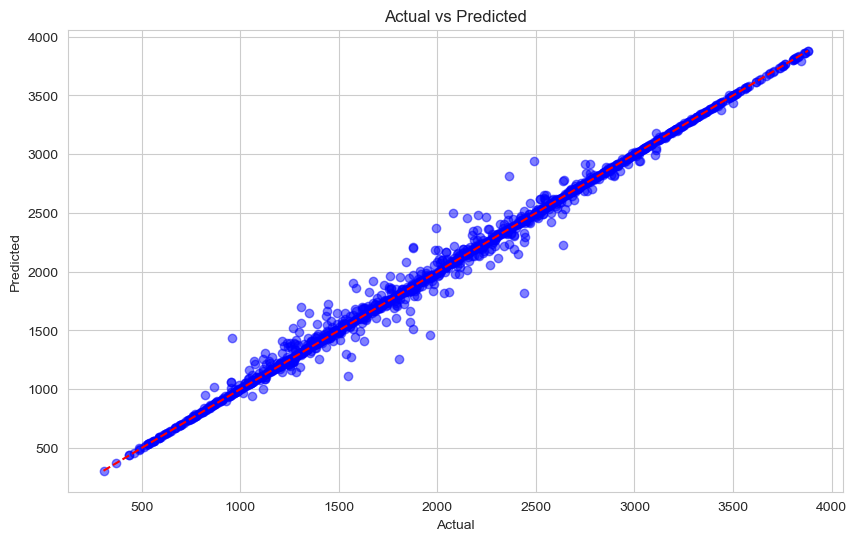

In [85]:
plot_regression_results(y_test, y_pred)

In [86]:
import random as rd
number_test = rd.randint(0, x_test.shape[0])
x_new = x_test.iloc[number_test]
y_new = y_test.iloc[number_test]
x_new = np.expand_dims(x_new, axis=0)
y_predict = model1.predict(x_new)
print("Giá trị dự đoán: ", round(y_predict[0]))
print("Giá trị thực tế: ", y_new)

f:\Anaconda\envs\torch-env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Giá trị dự đoán:  1356
Giá trị thực tế:  1355
